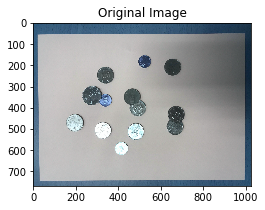

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('./coin/sIMG_8255.jpg')
       
plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(cv2.cvtColor(img, 0))
plt.title('Original Image')
plt.show()

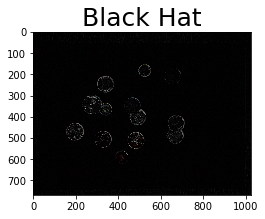

In [2]:
# blur=cv2.GaussianBlur(img,(5,5),0)

kernel=np.ones((5,5),np.uint8)
blackhat=cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(cv2.cvtColor(blackhat, 0))
plt.title('Black Hat', fontsize=25)
plt.show()

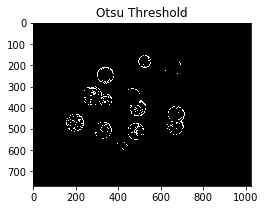

34.0


In [3]:
blackhat = cv2.cvtColor(blackhat, cv2.COLOR_RGB2GRAY)

ret,th=cv2.threshold(blackhat,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(cv2.cvtColor(th, 0))
plt.title('Otsu Threshold')
plt.show()
print(ret)

In [4]:
cont_img = th.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [5]:
print("Number of Contours found = " + str(len(contours)))

Number of Contours found = 391


In [ ]:
for i in range(len(contours)):
    cv2.drawContours(img, contours[i], -1, (0,255,0), 3)
    # add text
#     x,y,w,h = cv2.boundingRect(contours[i])
#     cv2.putText(img, 'C' + str(i+1),(x-10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1.1,(255,0,0),2)

plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Final result')
plt.show()